# 1. Importing Dependencies 

In [1]:
#import dependencies
import keras
from keras.datasets import mnist
from keras.layers import Dense, MaxPooling2D 
from keras.models import Sequential
from keras import optimizers
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
import numpy as np
from matplotlib import pyplot as plt # used for visualisation 
import pandas as pd #used to turn model history into a dataframe which we can manipulate and plot with
import time #used to compute code run time

Using TensorFlow backend.


# 2. Preparing the Data

In [2]:
# Preparing the dataset
# Setup train and test splits
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# printing the shape before reshaping and normalizing the data
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


# Reshape the data from a 3d tensor into a 2d tensor
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data to help with the training
X_train /= 255
X_test /= 255


# print the final input shape ready for training
print("Final Train matrix shape", X_train.shape)
print("Final Test matrix shape", X_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Final Train matrix shape (60000, 784)
Final Test matrix shape (10000, 784)


In [3]:
# one-hot encoding labels using keras 
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# 3. Single Layer Perceptron

## 3.1 Investigating effect of Epoch size on performance

In [4]:
#Single layer perceptron 
#model_1a uses epoch size of 50
model_1a = Sequential()
model_1a.add(Dense(units=10, activation='softmax', input_shape=(784,))) 
sgd = optimizers.SGD(lr=0.01)
model_1a.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_1a_history = model_1a.fit(x=X_train, y=y_train, batch_size=128, epochs=50, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_1a was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_1a_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_1a_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_1a_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_1a_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 24us/step - loss: 1.2809 - accuracy: 0.6992 - val_loss: 0.8108 - val_accuracy: 0.8331
Epoch 2/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.7159 - accuracy: 0.8415 - val_loss: 0.6064 - val_accuracy: 0.8619
Epoch 3/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.5867 - accuracy: 0.8592 - val_loss: 0.5246 - val_accuracy: 0.8771
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.5250 - accuracy: 0.8697 - val_loss: 0.4793 - val_accuracy: 0.8842
Epoch 5/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.4877 - accuracy: 0.8762 - val_loss: 0.4496 - val_accuracy: 0.8896
Epoch 6/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.4619 - accuracy: 0.8805 - val_loss: 0.4287 - val_accuracy: 0.8927
Epoch 7/50
60000/60000 [==============================] - 1s 15us/st

In [5]:
#Single layer perceptron 
#model_1b uses epoch size of 100
model_1b = Sequential()
model_1b.add(Dense(units=10, activation='softmax', input_shape=(784,))) 
sgd = optimizers.SGD(lr=0.01)
model_1b.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_1b_history = model_1b.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_1b was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_1b_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_1b_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_1b_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_1b_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.2867 - accuracy: 0.6945 - val_loss: 0.8152 - val_accuracy: 0.8339
Epoch 2/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.7202 - accuracy: 0.8407 - val_loss: 0.6083 - val_accuracy: 0.8627
Epoch 3/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.5900 - accuracy: 0.8585 - val_loss: 0.5260 - val_accuracy: 0.8747
Epoch 4/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.5277 - accuracy: 0.8683 - val_loss: 0.4802 - val_accuracy: 0.8805
Epoch 5/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4898 - accuracy: 0.8742 - val_loss: 0.4501 - val_accuracy: 0.8857
Epoch 6/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.4637 - accuracy: 0.8795 - val_loss: 0.4287 - val_accuracy: 0.8887
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3059 - accuracy: 0.9151 - val_loss: 0.2955 - val_accuracy: 0.9170
Epoch 57/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3052 - accuracy: 0.9150 - val_loss: 0.2950 - val_accuracy: 0.9173
Epoch 58/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3046 - accuracy: 0.9154 - val_loss: 0.2945 - val_accuracy: 0.9173
Epoch 59/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3040 - accuracy: 0.9155 - val_loss: 0.2941 - val_accuracy: 0.9177
Epoch 60/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3033 - accuracy: 0.9157 - val_loss: 0.2939 - val_accuracy: 0.9176
Epoch 61/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3027 - accuracy: 0.9156 - val_loss: 0.2934 - val_accuracy: 0.9174
Epoch 62/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.3022 - accuracy: 0.9159

In [6]:
#Single layer perceptron 
#model_1c uses epoch size of 200
model_1c = Sequential()
model_1c.add(Dense(units=10, activation='softmax', input_shape=(784,))) 
sgd = optimizers.SGD(lr=0.01)
model_1c.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_1c_history = model_1c.fit(x=X_train, y=y_train, batch_size=128, epochs=200, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_1c was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_1c_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_1c_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_1c_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_1c_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 16us/step - loss: 1.2679 - accuracy: 0.7066 - val_loss: 0.8090 - val_accuracy: 0.8340
Epoch 2/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.7143 - accuracy: 0.8397 - val_loss: 0.6063 - val_accuracy: 0.8650
Epoch 3/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.5863 - accuracy: 0.8582 - val_loss: 0.5254 - val_accuracy: 0.8749
Epoch 4/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.5249 - accuracy: 0.8683 - val_loss: 0.4796 - val_accuracy: 0.8809
Epoch 5/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.4876 - accuracy: 0.8752 - val_loss: 0.4500 - val_accuracy: 0.8858
Epoch 6/200
60000/60000 [==============================] - 1s 16us/step - loss: 0.4618 - accuracy: 0.8805 - val_loss: 0.4286 - val_accuracy: 0.8891
Epoch 7/200
60000/60000 [==============================] - 1s 

Epoch 56/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.3055 - accuracy: 0.9154 - val_loss: 0.2955 - val_accuracy: 0.9162
Epoch 57/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.3049 - accuracy: 0.9153 - val_loss: 0.2951 - val_accuracy: 0.9167
Epoch 58/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.3042 - accuracy: 0.9158 - val_loss: 0.2947 - val_accuracy: 0.9167
Epoch 59/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.3037 - accuracy: 0.9159 - val_loss: 0.2943 - val_accuracy: 0.9168
Epoch 60/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.3030 - accuracy: 0.9160 - val_loss: 0.2939 - val_accuracy: 0.9171
Epoch 61/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.3025 - accuracy: 0.9159 - val_loss: 0.2934 - val_accuracy: 0.9167
Epoch 62/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.3019 - accuracy: 0.9162

Epoch 111/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2841 - accuracy: 0.9208 - val_loss: 0.2809 - val_accuracy: 0.9211
Epoch 112/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2839 - accuracy: 0.9207 - val_loss: 0.2806 - val_accuracy: 0.9217
Epoch 113/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2836 - accuracy: 0.9208 - val_loss: 0.2803 - val_accuracy: 0.9218
Epoch 114/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2834 - accuracy: 0.9210 - val_loss: 0.2803 - val_accuracy: 0.9216
Epoch 115/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2832 - accuracy: 0.9210 - val_loss: 0.2804 - val_accuracy: 0.9213
Epoch 116/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2830 - accuracy: 0.9212 - val_loss: 0.2801 - val_accuracy: 0.9215
Epoch 117/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2828 - accuracy:

60000/60000 [==============================] - 1s 20us/step - loss: 0.2743 - accuracy: 0.9238 - val_loss: 0.2748 - val_accuracy: 0.9231
Epoch 166/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.2742 - accuracy: 0.9236 - val_loss: 0.2749 - val_accuracy: 0.9227
Epoch 167/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2741 - accuracy: 0.9240 - val_loss: 0.2750 - val_accuracy: 0.9229
Epoch 168/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2739 - accuracy: 0.9240 - val_loss: 0.2748 - val_accuracy: 0.9228
Epoch 169/200
60000/60000 [==============================] - 1s 15us/step - loss: 0.2738 - accuracy: 0.9240 - val_loss: 0.2748 - val_accuracy: 0.9225
Epoch 170/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2736 - accuracy: 0.9241 - val_loss: 0.2750 - val_accuracy: 0.9222
Epoch 171/200
60000/60000 [==============================] - 1s 14us/step - loss: 0.2735 - accuracy: 0.9240 - val_

## 3.1.1 Plotting accuracy of SLP models i.e model_1a, model_1b and model_1c 

Text(0.091, 0.5, 'Accuracy')

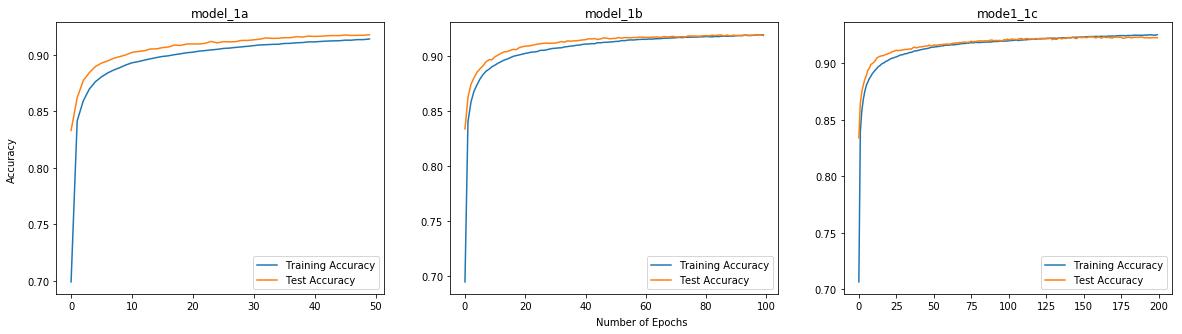

In [7]:
# plotting model_1a accuracy
model_1a_history_df = pd.DataFrame(model_1a_history.history) #converting history dictionary to pandas dataframe
model_1a_history_df = model_1a_history_df.apply(lambda x : round(x,4), axis=1) # rounding values to 3 decimal places
model_1a_history_df.columns = ['Test Loss', 'Test Accuracy', 'Training Loss', 'Training Accuracy'] # renaming columns


model_1b_history_df = pd.DataFrame(model_1b_history.history) #converting history dictionary to pandas dataframe
model_1b_history_df = model_1b_history_df.apply(lambda x : round(x,4), axis=1) # rounding values to 3 decimal places
model_1b_history_df.columns = ['Test Loss', 'Test Accuracy', 'Training Loss', 'Training Accuracy'] # renaming columns


model_1c_history_df = pd.DataFrame(model_1c_history.history) #converting history dictionary to pandas dataframe
model_1c_history_df = model_1c_history_df.apply(lambda x : round(x,4), axis=1) # rounding values to 3 decimal places
model_1c_history_df.columns = ['Test Loss', 'Test Accuracy', 'Training Loss', 'Training Accuracy'] # renaming columns

fig, ax = plt.subplots(ncols=3, figsize=(20,5))
model_1a_history_df[['Training Accuracy','Test Accuracy']].plot(ax=ax[0], title='model_1a')
model_1b_history_df[['Training Accuracy','Test Accuracy']].plot(ax=ax[1], title='model_1b')
model_1c_history_df[['Training Accuracy','Test Accuracy']].plot(ax=ax[2], title='mode1_1c')
fig.text(0.5, 0.04, 'Number of Epochs')
fig.text(0.091, 0.5, 'Accuracy', va='center', rotation='vertical')


## 3.2 Invesigating Effect of Batch Size

In [8]:
#Single layer perceptron 
#model_2a uses batch size of 128
model_2a = Sequential()
model_2a.add(Dense(units=10, activation='softmax', input_shape=(784,))) 
sgd = optimizers.SGD(lr=0.01)
model_2a.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_2a_history = model_2a.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_2a was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_2a_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_2a_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_2a_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_2a_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.2689 - accuracy: 0.7052 - val_loss: 0.8065 - val_accuracy: 0.8308
Epoch 2/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.7149 - accuracy: 0.8398 - val_loss: 0.6061 - val_accuracy: 0.8636
Epoch 3/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.5874 - accuracy: 0.8587 - val_loss: 0.5255 - val_accuracy: 0.8746
Epoch 4/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.5259 - accuracy: 0.8678 - val_loss: 0.4801 - val_accuracy: 0.8816
Epoch 5/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.4884 - accuracy: 0.8743 - val_loss: 0.4506 - val_accuracy: 0.8866
Epoch 6/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.4625 - accuracy: 0.8790 - val_loss: 0.4291 - val_accuracy: 0.8903
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.3053 - accuracy: 0.9152 - val_loss: 0.2958 - val_accuracy: 0.9177
Epoch 57/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3047 - accuracy: 0.9155 - val_loss: 0.2954 - val_accuracy: 0.9184
Epoch 58/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3040 - accuracy: 0.9158 - val_loss: 0.2949 - val_accuracy: 0.9181
Epoch 59/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3034 - accuracy: 0.9160 - val_loss: 0.2945 - val_accuracy: 0.9188
Epoch 60/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3028 - accuracy: 0.9158 - val_loss: 0.2937 - val_accuracy: 0.9186
Epoch 61/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3022 - accuracy: 0.9163 - val_loss: 0.2934 - val_accuracy: 0.9184
Epoch 62/100
60000/60000 [==============================] - 1s 15us/step - loss: 0.3016 - accuracy: 0.9162

In [9]:
#Single layer perceptron 
#model_2b uses batch size of 256
model_2b = Sequential()
model_2b.add(Dense(units=10, activation='softmax', input_shape=(784,))) 
sgd = optimizers.SGD(lr=0.01)
model_2b.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_2b_history = model_2b.fit(x=X_train, y=y_train, batch_size=256, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_2b was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_2b_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_2b_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_2b_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_2b_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 14us/step - loss: 1.5846 - accuracy: 0.5999 - val_loss: 1.1080 - val_accuracy: 0.7875
Epoch 2/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.9563 - accuracy: 0.8036 - val_loss: 0.8064 - val_accuracy: 0.8344
Epoch 3/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.7606 - accuracy: 0.8333 - val_loss: 0.6783 - val_accuracy: 0.8547
Epoch 4/100
60000/60000 [==============================] - 1s 14us/step - loss: 0.6643 - accuracy: 0.8469 - val_loss: 0.6062 - val_accuracy: 0.8630
Epoch 5/100
60000/60000 [==============================] - 1s 13us/step - loss: 0.6057 - accuracy: 0.8558 - val_loss: 0.5594 - val_accuracy: 0.8701
Epoch 6/100
60000/60000 [==============================] - 1s 12us/step - loss: 0.5658 - accuracy: 0.8621 - val_loss: 0.5258 - val_accuracy: 0.8740
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 11us/step - loss: 0.3353 - accuracy: 0.9063 - val_loss: 0.3203 - val_accuracy: 0.9123
Epoch 57/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3344 - accuracy: 0.9064 - val_loss: 0.3195 - val_accuracy: 0.9127
Epoch 58/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3335 - accuracy: 0.9068 - val_loss: 0.3187 - val_accuracy: 0.9127
Epoch 59/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3327 - accuracy: 0.9069 - val_loss: 0.3180 - val_accuracy: 0.9129
Epoch 60/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3318 - accuracy: 0.9073 - val_loss: 0.3172 - val_accuracy: 0.9132
Epoch 61/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3310 - accuracy: 0.9074 - val_loss: 0.3167 - val_accuracy: 0.9137
Epoch 62/100
60000/60000 [==============================] - 1s 9us/step - loss: 0.3302 - accuracy: 0.9076 - val

In [10]:
#Single layer perceptron 
#model_2c uses batch size of 512
model_2c = Sequential()
model_2c.add(Dense(units=10, activation='softmax', input_shape=(784,))) 
sgd = optimizers.SGD(lr=0.01)
model_2c.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_2c_history = model_2c.fit(x=X_train, y=y_train, batch_size=512, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_2c was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_2c_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_2c_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_2c_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_2c_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 9us/step - loss: 1.9047 - accuracy: 0.4309 - val_loss: 1.5046 - val_accuracy: 0.6877
Epoch 2/100
60000/60000 [==============================] - 0s 8us/step - loss: 1.3113 - accuracy: 0.7369 - val_loss: 1.1200 - val_accuracy: 0.7875
Epoch 3/100
60000/60000 [==============================] - 0s 7us/step - loss: 1.0386 - accuracy: 0.7941 - val_loss: 0.9249 - val_accuracy: 0.8210
Epoch 4/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.8892 - accuracy: 0.8164 - val_loss: 0.8095 - val_accuracy: 0.8354
Epoch 5/100
60000/60000 [==============================] - 0s 8us/step - loss: 0.7955 - accuracy: 0.8293 - val_loss: 0.7331 - val_accuracy: 0.8446
Epoch 6/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.7309 - accuracy: 0.8381 - val_loss: 0.6786 - val_accuracy: 0.8527
Epoch 7/100
60000/60000 [==============================] - 0s 8us/st

60000/60000 [==============================] - 0s 7us/step - loss: 0.3748 - accuracy: 0.8972 - val_loss: 0.3552 - val_accuracy: 0.9052
Epoch 57/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3736 - accuracy: 0.8977 - val_loss: 0.3541 - val_accuracy: 0.9057
Epoch 58/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3724 - accuracy: 0.8980 - val_loss: 0.3530 - val_accuracy: 0.9054
Epoch 59/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3712 - accuracy: 0.8982 - val_loss: 0.3519 - val_accuracy: 0.9060
Epoch 60/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3700 - accuracy: 0.8986 - val_loss: 0.3508 - val_accuracy: 0.9063
Epoch 61/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3689 - accuracy: 0.8988 - val_loss: 0.3499 - val_accuracy: 0.9067
Epoch 62/100
60000/60000 [==============================] - 0s 7us/step - loss: 0.3678 - accuracy: 0.8990 - val_loss: 0.3489 

# 4. Multi-layer Perceptron

## 4.1 Investigating Effect of Number of nodes

In [11]:
#Multilayer perceptron 
#model_3a uses 32 nodes in the hidden layer
model_3a = Sequential()
model_3a.add(Dense(units=32, activation='sigmoid', input_shape=(784,))) 
model_3a.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_3a.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_3a_history = model_3a.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_3a was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_3a_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_3a_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_3a_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_3a_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 18us/step - loss: 2.1563 - accuracy: 0.3993 - val_loss: 1.9343 - val_accuracy: 0.5892
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.7806 - accuracy: 0.6352 - val_loss: 1.6124 - val_accuracy: 0.6958
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.4868 - accuracy: 0.7017 - val_loss: 1.3443 - val_accuracy: 0.7476
Epoch 4/100
60000/60000 [==============================] - 1s 18us/step - loss: 1.2549 - accuracy: 0.7513 - val_loss: 1.1438 - val_accuracy: 0.7729
Epoch 5/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.0838 - accuracy: 0.7801 - val_loss: 0.9973 - val_accuracy: 0.8036
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.9580 - accuracy: 0.8042 - val_loss: 0.8887 - val_accuracy: 0.8258
Epoch 7/100
60000/60000 [==============================] - 1s 

60000/60000 [==============================] - 1s 16us/step - loss: 0.3016 - accuracy: 0.9150 - val_loss: 0.2926 - val_accuracy: 0.9206
Epoch 56/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2998 - accuracy: 0.9155 - val_loss: 0.2908 - val_accuracy: 0.9212
Epoch 57/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2980 - accuracy: 0.9164 - val_loss: 0.2894 - val_accuracy: 0.9215
Epoch 58/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2962 - accuracy: 0.9167 - val_loss: 0.2877 - val_accuracy: 0.9225
Epoch 59/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2945 - accuracy: 0.9170 - val_loss: 0.2862 - val_accuracy: 0.9222
Epoch 60/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2929 - accuracy: 0.9173 - val_loss: 0.2847 - val_accuracy: 0.9228
Epoch 61/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2913 - accuracy: 0.9179 - val_loss: 

In [12]:
#Multilayer perceptron 
#model_3b uses 64 nodes in the hidden layer
model_3b = Sequential()
model_3b.add(Dense(units=64, activation='sigmoid', input_shape=(784,))) 
model_3b.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_3b.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_3b_history = model_3b.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_3b was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_3b_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_3b_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_3b_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_3b_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 2.0333 - accuracy: 0.4931 - val_loss: 1.7722 - val_accuracy: 0.6806
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 1.5835 - accuracy: 0.7258 - val_loss: 1.3829 - val_accuracy: 0.7720
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 1.2580 - accuracy: 0.7815 - val_loss: 1.1120 - val_accuracy: 0.8111
Epoch 4/100
60000/60000 [==============================] - 1s 19us/step - loss: 1.0360 - accuracy: 0.8105 - val_loss: 0.9317 - val_accuracy: 0.8233
Epoch 5/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.8866 - accuracy: 0.8270 - val_loss: 0.8086 - val_accuracy: 0.8451
Epoch 6/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.7829 - accuracy: 0.8398 - val_loss: 0.7218 - val_accuracy: 0.8554
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2945 - accuracy: 0.9165 - val_loss: 0.2851 - val_accuracy: 0.9197
Epoch 57/100
60000/60000 [==============================] - 1s 20us/step - loss: 0.2930 - accuracy: 0.9170 - val_loss: 0.2837 - val_accuracy: 0.9200
Epoch 58/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2915 - accuracy: 0.9174 - val_loss: 0.2826 - val_accuracy: 0.9202
Epoch 59/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2900 - accuracy: 0.9176 - val_loss: 0.2811 - val_accuracy: 0.9208
Epoch 60/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2886 - accuracy: 0.9183 - val_loss: 0.2799 - val_accuracy: 0.9211
Epoch 61/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2872 - accuracy: 0.9183 - val_loss: 0.2788 - val_accuracy: 0.9212
Epoch 62/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.2858 - accuracy: 0.9189

In [13]:
#Multilayer perceptron 
#model_3c uses 128 nodes in the hidden layer
model_3c = Sequential()
model_3c.add(Dense(units=128, activation='sigmoid', input_shape=(784,))) 
model_3c.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_3c.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_3c_history = model_3c.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_3c was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_3c_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_3c_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_3c_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_3c_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 29us/step - loss: 2.0550 - accuracy: 0.4936 - val_loss: 1.7780 - val_accuracy: 0.7015
Epoch 2/100
60000/60000 [==============================] - 1s 24us/step - loss: 1.5583 - accuracy: 0.7246 - val_loss: 1.3385 - val_accuracy: 0.7766
Epoch 3/100
60000/60000 [==============================] - 1s 23us/step - loss: 1.1978 - accuracy: 0.7852 - val_loss: 1.0471 - val_accuracy: 0.8117
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.9674 - accuracy: 0.8164 - val_loss: 0.8651 - val_accuracy: 0.8387
Epoch 5/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.8211 - accuracy: 0.8348 - val_loss: 0.7472 - val_accuracy: 0.8490
Epoch 6/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.7233 - accuracy: 0.8472 - val_loss: 0.6660 - val_accuracy: 0.8581
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2950 - accuracy: 0.9155 - val_loss: 0.2862 - val_accuracy: 0.9182
Epoch 57/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2937 - accuracy: 0.9161 - val_loss: 0.2848 - val_accuracy: 0.9191
Epoch 58/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2924 - accuracy: 0.9164 - val_loss: 0.2840 - val_accuracy: 0.9194
Epoch 59/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2912 - accuracy: 0.9165 - val_loss: 0.2830 - val_accuracy: 0.9202
Epoch 60/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2899 - accuracy: 0.9169 - val_loss: 0.2816 - val_accuracy: 0.9198
Epoch 61/100
60000/60000 [==============================] - 1s 25us/step - loss: 0.2887 - accuracy: 0.9174 - val_loss: 0.2807 - val_accuracy: 0.9209
Epoch 62/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2875 - accuracy: 0.9174

## 4.2 Investigating Effect of Activation Functions

In [14]:
#Multilayer perceptron 
#model_4a uses sigmoid as the activation function
model_4a = Sequential()
model_4a.add(Dense(units=32, activation='sigmoid', input_shape=(784,))) 
model_4a.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_4a.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_4a_history = model_4a.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_4a was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_4a_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_4a_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_4a_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_4a_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 18us/step - loss: 2.1387 - accuracy: 0.4304 - val_loss: 1.9476 - val_accuracy: 0.6522
Epoch 2/100
60000/60000 [==============================] - 1s 17us/step - loss: 1.7817 - accuracy: 0.6863 - val_loss: 1.6119 - val_accuracy: 0.7226
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 1.4762 - accuracy: 0.7372 - val_loss: 1.3341 - val_accuracy: 0.7683
Epoch 4/100
60000/60000 [==============================] - 1s 16us/step - loss: 1.2364 - accuracy: 0.7724 - val_loss: 1.1261 - val_accuracy: 0.7960
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 1.0600 - accuracy: 0.7982 - val_loss: 0.9749 - val_accuracy: 0.8162
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.9309 - accuracy: 0.8158 - val_loss: 0.8635 - val_accuracy: 0.8339
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3006 - accuracy: 0.9154 - val_loss: 0.2898 - val_accuracy: 0.9202
Epoch 57/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2988 - accuracy: 0.9161 - val_loss: 0.2884 - val_accuracy: 0.9206
Epoch 58/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2972 - accuracy: 0.9164 - val_loss: 0.2869 - val_accuracy: 0.9213
Epoch 59/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2955 - accuracy: 0.9169 - val_loss: 0.2855 - val_accuracy: 0.9213
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2939 - accuracy: 0.9172 - val_loss: 0.2840 - val_accuracy: 0.9215
Epoch 61/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.2923 - accuracy: 0.9176 - val_loss: 0.2827 - val_accuracy: 0.9220
Epoch 62/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.2908 - accuracy: 0.9180

In [15]:
#Multilayer perceptron 
#model_4b uses tanh as the activation function
model_4b = Sequential()
model_4b.add(Dense(units=32, activation='tanh', input_shape=(784,))) 
model_4b.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_4b.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_4b_history = model_4b.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_4b was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_4b_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_4b_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_4b_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_4b_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 19us/step - loss: 1.2000 - accuracy: 0.7068 - val_loss: 0.7629 - val_accuracy: 0.8345
Epoch 2/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.6638 - accuracy: 0.8484 - val_loss: 0.5562 - val_accuracy: 0.8728
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.5280 - accuracy: 0.8725 - val_loss: 0.4696 - val_accuracy: 0.8860
Epoch 4/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.4612 - accuracy: 0.8833 - val_loss: 0.4201 - val_accuracy: 0.8954
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.4204 - accuracy: 0.8908 - val_loss: 0.3883 - val_accuracy: 0.9012
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3924 - accuracy: 0.8956 - val_loss: 0.3661 - val_accuracy: 0.9043
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1777 - accuracy: 0.9496 - val_loss: 0.1821 - val_accuracy: 0.9464
Epoch 57/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1763 - accuracy: 0.9500 - val_loss: 0.1807 - val_accuracy: 0.9474
Epoch 58/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1749 - accuracy: 0.9503 - val_loss: 0.1795 - val_accuracy: 0.9485
Epoch 59/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1736 - accuracy: 0.9509 - val_loss: 0.1786 - val_accuracy: 0.9483
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1723 - accuracy: 0.9510 - val_loss: 0.1771 - val_accuracy: 0.9488
Epoch 61/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1710 - accuracy: 0.9515 - val_loss: 0.1767 - val_accuracy: 0.9487
Epoch 62/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1698 - accuracy: 0.9520

In [16]:
#Multilayer perceptron 
#model_4c uses relu as the activation function
model_4c = Sequential()
model_4c.add(Dense(units=32, activation='relu', input_shape=(784,))) 
model_4c.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_4c.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_4c_history = model_4c.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_4c was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_4c_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_4c_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_4c_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_4c_history.history['val_loss'][-1]:.4f}")   

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 18us/step - loss: 1.3119 - accuracy: 0.6456 - val_loss: 0.7399 - val_accuracy: 0.8275
Epoch 2/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.6163 - accuracy: 0.8434 - val_loss: 0.4981 - val_accuracy: 0.8701
Epoch 3/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4738 - accuracy: 0.8721 - val_loss: 0.4155 - val_accuracy: 0.8856
Epoch 4/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.4139 - accuracy: 0.8847 - val_loss: 0.3743 - val_accuracy: 0.8948
Epoch 5/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3797 - accuracy: 0.8928 - val_loss: 0.3484 - val_accuracy: 0.9014
Epoch 6/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.3565 - accuracy: 0.8989 - val_loss: 0.3306 - val_accuracy: 0.9053
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1622 - accuracy: 0.9549 - val_loss: 0.1672 - val_accuracy: 0.9508
Epoch 57/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1609 - accuracy: 0.9554 - val_loss: 0.1661 - val_accuracy: 0.9511
Epoch 58/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1594 - accuracy: 0.9558 - val_loss: 0.1652 - val_accuracy: 0.9512
Epoch 59/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1581 - accuracy: 0.9562 - val_loss: 0.1646 - val_accuracy: 0.9519
Epoch 60/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1568 - accuracy: 0.9563 - val_loss: 0.1630 - val_accuracy: 0.9521
Epoch 61/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1556 - accuracy: 0.9568 - val_loss: 0.1612 - val_accuracy: 0.9519
Epoch 62/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1542 - accuracy: 0.9571

## 4.1.1 Plotting tanh and relu activations overfitting

NameError: name 'model_4b_history_df' is not defined

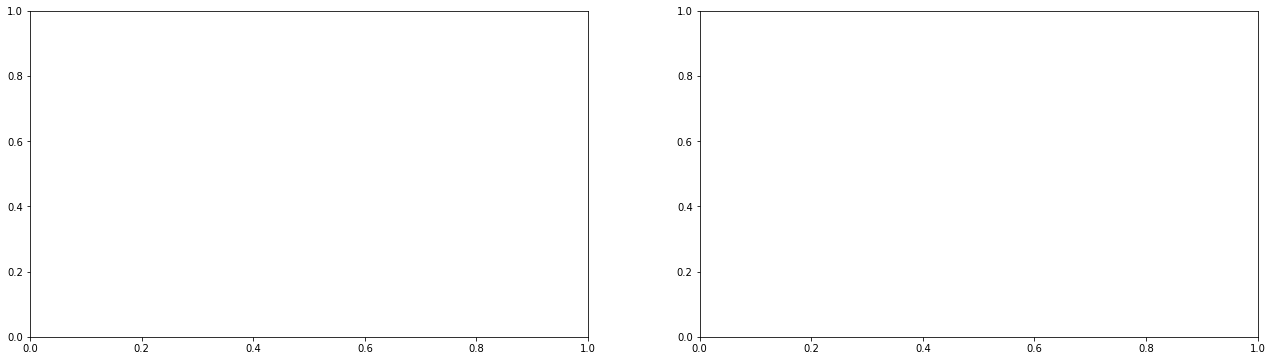

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(22,6))
model_4b_history_df[['Training Accuracy','Test Accuracy']].plot(ax=ax[0], title='model_4b tanh',xlim=[15,100], ylim=[0.92,0.97])
model_4c_history_df[['Training Accuracy','Test Accuracy']].plot(ax=ax[1], title='model_4c relu',xlim=[15,100], ylim=[0.92,0.97])
fig.text(0.5, 0.04, 'Number of Epochs')
fig.text(0.091, 0.5, 'Accuracy', va='center', rotation='vertical')
fig.suptitle('Tanh and RELU Activations Overfitting')
plt.savefig('tanh_and_relu_overfitting.png')


## 4.3 Investigating Effect of Number of Hidden Layers

In [18]:
#Multilayer perceptron 

#model_5a uses one hidden layer
model_5a = Sequential()
model_5a.add(Dense(units=32, activation='relu', input_shape=(784,))) 
model_5a.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_5a.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_5a_history = model_5a.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_5a was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_5a_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_5a_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_5a_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_5a_history.history['val_loss'][-1]:.4f}")  

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 19us/step - loss: 1.3536 - accuracy: 0.6452 - val_loss: 0.7624 - val_accuracy: 0.8281
Epoch 2/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.6290 - accuracy: 0.8501 - val_loss: 0.5114 - val_accuracy: 0.8791
Epoch 3/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.4817 - accuracy: 0.8760 - val_loss: 0.4250 - val_accuracy: 0.8907
Epoch 4/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.4204 - accuracy: 0.8869 - val_loss: 0.3822 - val_accuracy: 0.8988
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3864 - accuracy: 0.8938 - val_loss: 0.3563 - val_accuracy: 0.9046
Epoch 6/100
60000/60000 [==============================] - ETA: 0s - loss: 0.3641 - accuracy: 0.89 - 1s 17us/step - loss: 0.3640 - accuracy: 0.8989 - val_loss: 0.3390 - val_accuracy: 0.9071
Epoch 7/100
60000/60

60000/60000 [==============================] - 1s 16us/step - loss: 0.1788 - accuracy: 0.9502 - val_loss: 0.1814 - val_accuracy: 0.9483
Epoch 56/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1774 - accuracy: 0.9510 - val_loss: 0.1805 - val_accuracy: 0.9481
Epoch 57/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1759 - accuracy: 0.9511 - val_loss: 0.1793 - val_accuracy: 0.9476
Epoch 58/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1745 - accuracy: 0.9514 - val_loss: 0.1775 - val_accuracy: 0.9484
Epoch 59/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1730 - accuracy: 0.9523 - val_loss: 0.1772 - val_accuracy: 0.9500
Epoch 60/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1717 - accuracy: 0.9519 - val_loss: 0.1762 - val_accuracy: 0.9497
Epoch 61/100
60000/60000 [==============================] - 1s 16us/step - loss: 0.1704 - accuracy: 0.9526 - val_loss: 

In [19]:
#Multilayer perceptron 

#model_5b uses two hidden layer
model_5b = Sequential()
model_5b.add(Dense(units=32, activation='relu', input_shape=(784,)))
model_5b.add(Dense(units=32, activation='relu')) 
model_5b.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_5b.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_5b_history = model_5b.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_5b was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_5b_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_5b_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_5b_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_5b_history.history['val_loss'][-1]:.4f}")  

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 21us/step - loss: 1.5734 - accuracy: 0.5475 - val_loss: 0.8789 - val_accuracy: 0.7749
Epoch 2/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.6904 - accuracy: 0.8080 - val_loss: 0.5372 - val_accuracy: 0.8444
Epoch 3/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.4991 - accuracy: 0.8599 - val_loss: 0.4261 - val_accuracy: 0.8811
Epoch 4/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.4165 - accuracy: 0.8838 - val_loss: 0.3692 - val_accuracy: 0.8955
Epoch 5/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3711 - accuracy: 0.8962 - val_loss: 0.3351 - val_accuracy: 0.9051
Epoch 6/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.3420 - accuracy: 0.9036 - val_loss: 0.3135 - val_accuracy: 0.9108
Epoch 7/100
60000/60000 [==============================] - 1s 

60000/60000 [==============================] - 1s 17us/step - loss: 0.1219 - accuracy: 0.9648 - val_loss: 0.1372 - val_accuracy: 0.9589
Epoch 56/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1204 - accuracy: 0.9653 - val_loss: 0.1347 - val_accuracy: 0.9602
Epoch 57/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1190 - accuracy: 0.9656 - val_loss: 0.1358 - val_accuracy: 0.9595
Epoch 58/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1176 - accuracy: 0.9660 - val_loss: 0.1328 - val_accuracy: 0.9602
Epoch 59/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1162 - accuracy: 0.9665 - val_loss: 0.1338 - val_accuracy: 0.9597
Epoch 60/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.1149 - accuracy: 0.9671 - val_loss: 0.1313 - val_accuracy: 0.9613
Epoch 61/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.1135 - accuracy: 0.9669 - val_loss: 

In [20]:
#Multilayer perceptron 

#model_5c uses three hidden layer
model_5c = Sequential()
model_5c.add(Dense(units=32, activation='relu', input_shape=(784,)))
model_5c.add(Dense(units=32, activation='relu')) 
model_5c.add(Dense(units=32, activation='relu')) 

model_5c.add(Dense(units=10, activation='softmax')) 
sgd = optimizers.SGD(lr=0.01)
model_5c.compile(optimizer = sgd, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_5c_history = model_5c.fit(x=X_train, y=y_train, batch_size=128, epochs=100, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_5c was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_5c_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_5c_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_5c_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_5c_history.history['val_loss'][-1]:.4f}")  

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 1s 20us/step - loss: 1.8080 - accuracy: 0.4221 - val_loss: 1.0233 - val_accuracy: 0.7446
Epoch 2/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.6855 - accuracy: 0.8150 - val_loss: 0.4914 - val_accuracy: 0.8646
Epoch 3/100
60000/60000 [==============================] - 1s 19us/step - loss: 0.4484 - accuracy: 0.8712 - val_loss: 0.3888 - val_accuracy: 0.8913
Epoch 4/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3807 - accuracy: 0.8905 - val_loss: 0.3498 - val_accuracy: 0.8997
Epoch 5/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3437 - accuracy: 0.9005 - val_loss: 0.3158 - val_accuracy: 0.9087
Epoch 6/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.3180 - accuracy: 0.9072 - val_loss: 0.2930 - val_accuracy: 0.9147
Epoch 7/100
60000/60000 [==============================] - 1s 

Epoch 56/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0916 - accuracy: 0.9728 - val_loss: 0.1268 - val_accuracy: 0.9627
Epoch 57/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0903 - accuracy: 0.9732 - val_loss: 0.1270 - val_accuracy: 0.9624
Epoch 58/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0891 - accuracy: 0.9737 - val_loss: 0.1226 - val_accuracy: 0.9638
Epoch 59/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0876 - accuracy: 0.9740 - val_loss: 0.1216 - val_accuracy: 0.9637
Epoch 60/100
60000/60000 [==============================] - 1s 17us/step - loss: 0.0866 - accuracy: 0.9739 - val_loss: 0.1223 - val_accuracy: 0.9622
Epoch 61/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0855 - accuracy: 0.9748 - val_loss: 0.1213 - val_accuracy: 0.9642
Epoch 62/100
60000/60000 [==============================] - 1s 18us/step - loss: 0.0841 - accuracy: 0.9755

# 5. Convolutional Neural Networks

In [21]:
# Reshape the data again for CNN
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize the data to help with the training
X_train /= 255
X_test /= 255


# print the final input shape ready for training
print("Final Train matrix shape", X_train.shape)
print("Final Test matrix shape", X_test.shape)

Final Train matrix shape (60000, 28, 28, 1)
Final Test matrix shape (10000, 28, 28, 1)


## 5.1 Investigating Effect of Learning rate

In [22]:
#CNN 

#model_6a uses a learning rate of 0.001

model_6a = Sequential()
model_6a.add(Conv2D(filters = 32, kernel_size =(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_6a.add(MaxPooling2D((2, 2)))
model_6a.add(Conv2D(filters = 64, kernel_size =(3, 3), activation='relu'))
model_6a.add(MaxPooling2D((2, 2)))
model_6a.add(Conv2D(filters = 64, kernel_size =(3, 3), activation='relu'))
model_6a.add(Flatten())
model_6a.add(Dense(64, activation='relu'))
model_6a.add(Dense(10, activation='softmax'))


# compile model_6a
rmsprop = optimizers.RMSprop(learning_rate=0.001, rho=0.9)
model_6a.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_6a_history = model_6a.fit(x=X_train, y=y_train, batch_size=64, epochs=5, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_6a was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_6a_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_6a_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_6a_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_6a_history.history['val_loss'][-1]:.4f}")  

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 47s 783us/step - loss: 0.9456 - accuracy: 0.6836 - val_loss: 0.4174 - val_accuracy: 0.8646
Epoch 2/5
60000/60000 [==============================] - 45s 746us/step - loss: 0.2532 - accuracy: 0.9220 - val_loss: 0.1694 - val_accuracy: 0.9487
Epoch 3/5
60000/60000 [==============================] - 44s 733us/step - loss: 0.1333 - accuracy: 0.9586 - val_loss: 0.1126 - val_accuracy: 0.9640
Epoch 4/5
60000/60000 [==============================] - 43s 715us/step - loss: 0.0915 - accuracy: 0.9711 - val_loss: 0.0701 - val_accuracy: 0.9782
Epoch 5/5
60000/60000 [==============================] - 43s 710us/step - loss: 0.0720 - accuracy: 0.9769 - val_loss: 0.0557 - val_accuracy: 0.9828
Total compute time to train model_6a was: 222.13 seconds
Training Accuracy: 0.9769
Test Accuracy: 0.9828
Training Loss: 0.0720
Test Loss: 0.0557


In [23]:
#CNN 

#model_6b uses a learning rate of 0.0001

model_6b = Sequential()
model_6b.add(Conv2D(filters = 32, kernel_size =(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_6b.add(MaxPooling2D((2, 2)))
model_6b.add(Conv2D(filters = 64, kernel_size =(3, 3), activation='relu'))
model_6b.add(MaxPooling2D((2, 2)))
model_6b.add(Conv2D(filters = 64, kernel_size =(3, 3), activation='relu'))
model_6b.add(Flatten())
model_6b.add(Dense(64, activation='relu'))
model_6b.add(Dense(10, activation='softmax'))


# compile model_6b
rmsprop = optimizers.RMSprop(learning_rate=0.0001, rho=0.9)
model_6b.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_6b_history = model_6b.fit(x=X_train, y=y_train, batch_size=64, epochs=5, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_6b was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_6b_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_6b_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_6b_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_6b_history.history['val_loss'][-1]:.4f}")  

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 42s 707us/step - loss: 2.0302 - accuracy: 0.4227 - val_loss: 1.3004 - val_accuracy: 0.6693
Epoch 2/5
60000/60000 [==============================] - 46s 762us/step - loss: 0.8559 - accuracy: 0.7491 - val_loss: 0.5903 - val_accuracy: 0.8168
Epoch 3/5
60000/60000 [==============================] - 51s 853us/step - loss: 0.5607 - accuracy: 0.8267 - val_loss: 0.4881 - val_accuracy: 0.8476
Epoch 4/5
60000/60000 [==============================] - 49s 817us/step - loss: 0.4804 - accuracy: 0.8520 - val_loss: 0.4280 - val_accuracy: 0.8670
Epoch 5/5
60000/60000 [==============================] - 44s 734us/step - loss: 0.4328 - accuracy: 0.8654 - val_loss: 0.3991 - val_accuracy: 0.8768
Total compute time to train model_6b was: 233.13 seconds
Training Accuracy: 0.8654
Test Accuracy: 0.8768
Training Loss: 0.4328
Test Loss: 0.3991


In [24]:
#CNN 

#model_6c uses a learning rate of 0.01

model_6c = Sequential()
model_6c.add(Conv2D(filters = 32, kernel_size =(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_6c.add(MaxPooling2D((2, 2)))
model_6c.add(Conv2D(filters = 64, kernel_size =(3, 3), activation='relu'))
model_6c.add(MaxPooling2D((2, 2)))
model_6c.add(Conv2D(filters = 64, kernel_size =(3, 3), activation='relu'))
model_6c.add(Flatten())
model_6c.add(Dense(64, activation='relu'))
model_6c.add(Dense(10, activation='softmax'))


# compile model_6c
rmsprop = optimizers.RMSprop(learning_rate=0.01, rho=0.9)
model_6c.compile(optimizer=rmsprop, loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
model_6c_history = model_6c.fit(x=X_train, y=y_train, batch_size=64, epochs=5, verbose=True, validation_data=(X_test, y_test))
finish = time.time()

#print report of accuracy, loss and run time 
print(f'Total compute time to train model_6c was: {finish-start:.2f} seconds')
print(f"Training Accuracy: {model_6c_history.history['accuracy'][-1]:.4f}")
print(f"Test Accuracy: {model_6c_history.history['val_accuracy'][-1]:.4f}")
print(f"Training Loss: {model_6c_history.history['loss'][-1]:.4f}")
print(f"Test Loss: {model_6c_history.history['val_loss'][-1]:.4f}")  

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 712us/step - loss: 2.3150 - accuracy: 0.1104 - val_loss: 2.3018 - val_accuracy: 0.1028
Epoch 2/5
60000/60000 [==============================] - 44s 727us/step - loss: 2.3020 - accuracy: 0.1099 - val_loss: 2.3013 - val_accuracy: 0.1135
Epoch 3/5
60000/60000 [==============================] - 43s 710us/step - loss: 2.3023 - accuracy: 0.1106 - val_loss: 2.3015 - val_accuracy: 0.1135
Epoch 4/5
60000/60000 [==============================] - 44s 730us/step - loss: 2.3021 - accuracy: 0.1104 - val_loss: 2.3017 - val_accuracy: 0.1135
Epoch 5/5
60000/60000 [==============================] - 44s 729us/step - loss: 2.3022 - accuracy: 0.1101 - val_loss: 2.3020 - val_accuracy: 0.1135
Total compute time to train model_6c was: 217.17 seconds
Training Accuracy: 0.1101
Test Accuracy: 0.1135
Training Loss: 2.3022
Test Loss: 2.3020
